In [10]:
import numpy as np
import matplotlib.pyplot as plt

grid_width = 150
grid_height = 150
grid_initial_value = 0

# Add some random 1s
grid = np.random.rand(grid_width, grid_height)
grid = np.where(grid > 0.1, 1, 0)
print(grid)

[[0 1 1 ... 1 1 1]
 [1 1 1 ... 0 1 1]
 [1 1 0 ... 0 0 1]
 ...
 [1 1 1 ... 1 1 1]
 [0 1 1 ... 0 1 0]
 [1 1 1 ... 1 1 1]]


In [11]:
import matplotlib as mpl
from matplotlib import pyplot
from scipy import signal
import time

# If we apply a convolution to the grid which sums the edges, we can produce a grid of total living neighbour counts
conway_kernel = np.array([[1,1,1],[1,0,1], [1,1,1]])
print(conway_kernel)

cmap = mpl.colors.ListedColormap(['black','orange', 'yellow', 'red', 'white'])
bounds=[0,1,2,3,4]

[[1 1 1]
 [1 0 1]
 [1 1 1]]


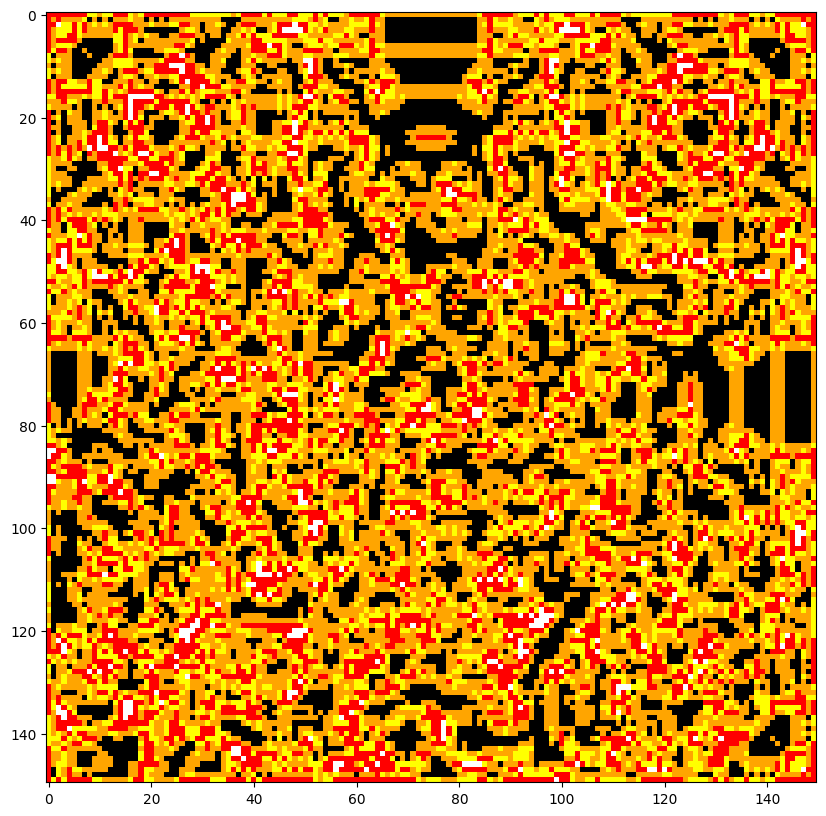

In [12]:
total_steps = 100
steps = 0
from IPython.display import clear_output
pyplot.rcParams["figure.figsize"] = (10,10)

# Apply Conway's rules based on neighbour count
while (steps < total_steps):
    clear_output(wait=True)

    # Inject some energy into the middle
    np.put(grid, grid_width * np.ceil(grid_height / 2), 1)

    # returns a grid of the same size (symm) with edges filled with 0s (nothing lives outside the grid!)
    # fixed grid - mode = same and boundary = fill, fillvalue determines if border discourages life or has no effect
    # fillvalue = 1 is my favourite
    neighbour_count_grid = signal.convolve2d(grid, conway_kernel, boundary='fill', mode='same', fillvalue=1)

    # Assuming that rules which kill live cells can be applied to dead cells as well...
    # Any live cell with fewer than two live neighbours dies, as if by underpopulation.
    rule_one = np.where(neighbour_count_grid < 2, 0, neighbour_count_grid)

    # Any live cell with more than three live neighbours dies, as if by overpopulation.
    rule_two = np.where(rule_one > 3, 0, rule_one)

    # Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.
    rule_three = np.where(rule_two == 3, 1, rule_two)
    
    # We need to filter out 2s and 3s and make them 1s
    grid = np.where(rule_three > 1, 1, rule_three)

    # It is more interesting (and colourful!) to plot the neighbour counts
    pyplot.imshow(neighbour_count_grid,interpolation='nearest', cmap=cmap)

    pyplot.show()
    
    steps = steps + 1